# test ODE

In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the number of neurons, learning rate, and epochs
neurons = 10
learnrate = 0.1

# Define the neural network architecture
NN = nn.Sequential(nn.Linear(1, neurons), nn.Sigmoid(), nn.Linear(neurons, 1, bias=False))
adam = torch.optim.Adam(NN.parameters(), lr=learnrate)

# Define the domain
x = torch.linspace(-5, 5, 100).unsqueeze(1)
x_zero = torch.zeros_like(x)

# define our approximator:
pred = lambda x: NN(x) 

# Define the boundary conditions
def boundary_condition_u(x):
    return torch.ones_like(x)  # u(0) = 1

# Define the function for the analytical solution
def analytical_solution(x):
    return torch.cos(x)  # Example of an analytical solution


def loss_function(x):
    
    x.requires_grad_(True)
    x_zero.requires_grad_(True)
    # Define the forward pass
    
    uNN = pred(x)*torch.tanh(x)
    # Calculate u''(x)
    u_x = torch.autograd.grad(uNN, x, grad_outputs=torch.ones_like(uNN), create_graph=True, allow_unused=True, retain_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True, allow_unused=True, retain_graph=True)[0]
    # Calculate u''(0)
    Unn1 = pred(x_zero)
    u_x1 = torch.autograd.grad(Unn1, x_zero, grad_outputs=torch.ones_like(Unn1), create_graph=True, allow_unused=True, retain_graph=True)[0]
    u_xx1 = torch.autograd.grad(u_x1, x_zero, grad_outputs=torch.ones_like(u_x1), create_graph=True, allow_unused=True, retain_graph=True)[0]
    

    # Calculate ODE residual
    pde_residual_1 = u_xx + uNN

    # pde_residual_2 = uNN - analytical_solution(x)

    # Calculate boundary residuals
    boundary_residual_u = pred(x_zero) - boundary_condition_u(x)  # u(0) = 1
    
    # boundary_residual_uprime = boundary_condition_uprime(x_zero) - x_zero # (u'(0))^2
    boundary_residual_uprime = u_xx1 - x_zero # (u'(0))^2

    # Total loss
    total_loss = torch.mean(pde_residual_1**2)  + torch.mean(boundary_residual_u**2) + torch.mean(boundary_residual_uprime**2)
    # total_loss = torch.mean(pde_residual_1**2) + torch.mean(boundary_residual_u**2) + torch.mean(boundary_residual_uprime**2)

    return total_loss, uNN 


Epoch 1, Loss: 0.022804174423217773
Epoch 2, Loss: 0.007564392685890198
Epoch 3, Loss: 0.003449704349040985
Epoch 4, Loss: 0.005996502637863159
Epoch 5, Loss: 0.008988664150238038
Epoch 6, Loss: 0.009228621125221253
Epoch 7, Loss: 0.007414223551750183
Epoch 8, Loss: 0.0051898366212844846
Epoch 9, Loss: 0.003674638271331787
Epoch 10, Loss: 0.0032283997535705565
Epoch 11, Loss: 0.003627890050411224
Epoch 12, Loss: 0.0043587440252304075
Epoch 13, Loss: 0.004919530153274536
Epoch 14, Loss: 0.005030402541160583
Epoch 15, Loss: 0.004682623445987701
Epoch 16, Loss: 0.004058784544467926
Epoch 17, Loss: 0.0034071359038352965
Epoch 18, Loss: 0.002936091423034668
Epoch 19, Loss: 0.002750362157821655
Epoch 20, Loss: 0.0028263169527053835
Epoch 21, Loss: 0.003038570284843445
Epoch 22, Loss: 0.0032298362255096438
Epoch 23, Loss: 0.0032826068997383116
Epoch 24, Loss: 0.0031635314226150513
Epoch 25, Loss: 0.0029212501645088196
Epoch 26, Loss: 0.0026512473821640016
Epoch 27, Loss: 0.0024436092376708984

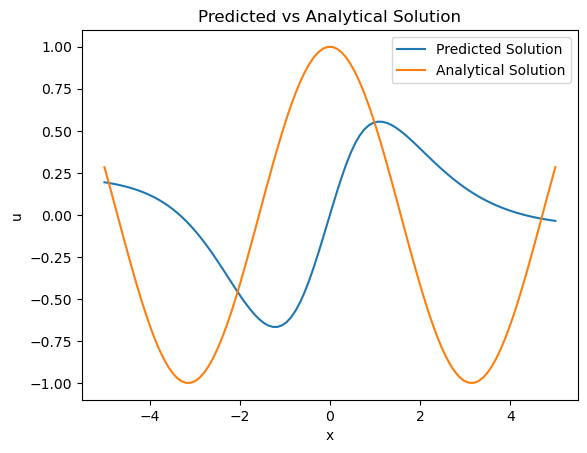

In [20]:
def train(optimizer, epochs):
    lossList = []
    epochList = [] 

    for epoch in range(epochs):
        total_loss = 0

        optimizer.zero_grad()   
        loss_val = loss_function(x)[0]  # Calculate the loss
        loss_val.backward()  # Backpropagation
        optimizer.step()
        total_loss += loss_val.item()
        
        print(f"Epoch {epoch + 1}, Loss: {total_loss / 100}")  # Assuming 100 data points

        # Record loss and epoch
        lossList.append(total_loss / 100)
        epochList.append(epoch)
        
        U = loss_function(x)[1]
        

        #uNN = pred(x)
        analytical = analytical_solution(x)

    plt.plot(x.detach().numpy(), U.detach().numpy(), label='Predicted Solution')
    plt.plot(x.detach().numpy(), analytical.detach().numpy(), label='Analytical Solution')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Predicted vs Analytical Solution')
    plt.legend()
    plt.show()


# Train the neural network
train(adam, 50)


Epoch 1, Loss: 0.0009134972095489502
Epoch 2, Loss: 0.0008973774313926697
Epoch 3, Loss: 0.0008854985237121582
Epoch 4, Loss: 0.0008683297783136368
Epoch 5, Loss: 0.0008448641002178193
Epoch 6, Loss: 0.0008168201893568039
Epoch 7, Loss: 0.0007862917333841323
Epoch 8, Loss: 0.0007592205703258514
Epoch 9, Loss: 0.0007414772361516952
Epoch 10, Loss: 0.000730796605348587
Epoch 11, Loss: 0.0007195702940225601
Epoch 12, Loss: 0.0007046729326248169
Epoch 13, Loss: 0.0006893017888069153
Epoch 14, Loss: 0.0006772514432668685
Epoch 15, Loss: 0.0006696270406246186
Epoch 16, Loss: 0.0006651386618614196
Epoch 17, Loss: 0.0006607923656702042
Epoch 18, Loss: 0.0006542090326547622
Epoch 19, Loss: 0.0006464489549398423
Epoch 20, Loss: 0.000640389546751976
Epoch 21, Loss: 0.0006365940719842911
Epoch 22, Loss: 0.000633314698934555
Epoch 23, Loss: 0.0006296098232269287
Epoch 24, Loss: 0.0006258754432201386
Epoch 25, Loss: 0.0006224770098924637
Epoch 26, Loss: 0.000619729608297348
Epoch 27, Loss: 0.0006178

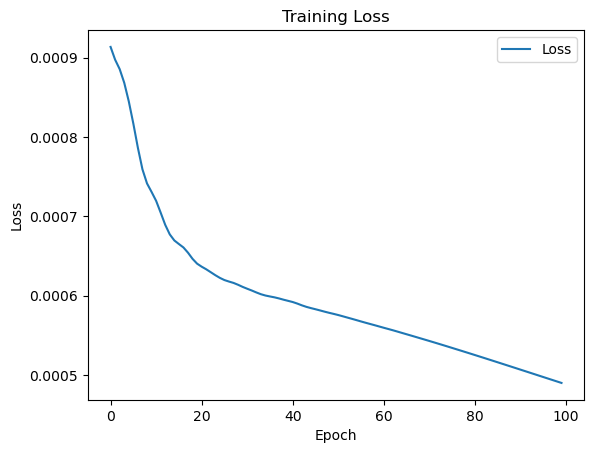

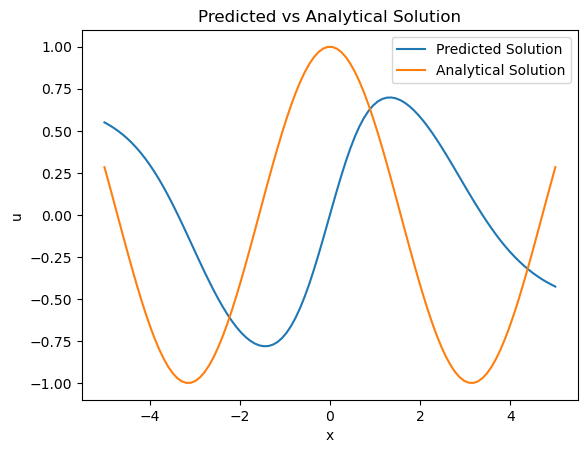

In [21]:
import matplotlib.pyplot as plt

def train(optimizer, epochs):
    lossList = []
    epochList = [] 

    for epoch in range(epochs):
        total_loss = 0

        optimizer.zero_grad()   
        loss_val = loss_function(x)[0]  # Calculate the loss
        loss_val.backward()  # Backpropagation
        optimizer.step()
        total_loss += loss_val.item()
        
        print(f"Epoch {epoch + 1}, Loss: {total_loss / 100}")  # Assuming 100 data points

        # Record loss and epoch
        lossList.append(total_loss / 100)
        epochList.append(epoch)
        
        U = loss_function(x)[1]
        

        #uNN = pred(x)
        analytical = analytical_solution(x)

    # Plot the loss curve
    plt.figure()
    plt.plot(epochList, lossList, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

    # Plot predicted solution and analytical solution
    plt.figure()
    plt.plot(x.detach().numpy(), U.detach().numpy(), label='Predicted Solution')
    plt.plot(x.detach().numpy(), analytical.detach().numpy(), label='Analytical Solution')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Predicted vs Analytical Solution')
    plt.legend()
    plt.show()

# Train the neural network
train(adam, 100)
